In [36]:
from collections import Counter
from sklearn.datasets import make_classification, load_breast_cancer, load_wine
from imblearn.under_sampling import EditedNearestNeighbours, InstanceHardnessThreshold
import matplotlib.pyplot as plt
from numpy import where
import seaborn as sns
from sklearn.manifold import TSNE

1797


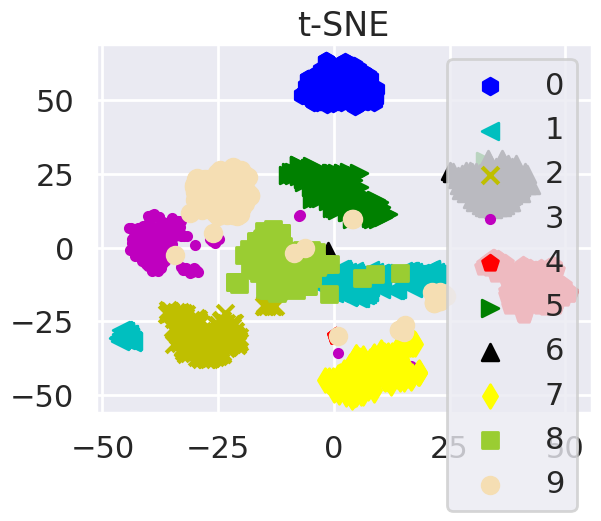

In [37]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import pyplot as plt
 
# 0-9的数字数据
digits = load_digits()
embeddings = TSNE().fit_transform(digits.data)#t-SNE降维，默认降为二维
vis_x = embeddings[:, 0]#0维
vis_y = embeddings[:, 1]#1维
print(len(digits.target))
 
index0 = [i for i in range(len(digits.target)) if digits.target[i] == 0]
index1 = [i for i in range(len(digits.target)) if digits.target[i] == 1]
index2 = [i for i in range(len(digits.target)) if digits.target[i] == 2]
index3 = [i for i in range(len(digits.target)) if digits.target[i] == 3]
index4 = [i for i in range(len(digits.target)) if digits.target[i] == 4]
index5 = [i for i in range(len(digits.target)) if digits.target[i] == 5]
index6 = [i for i in range(len(digits.target)) if digits.target[i] == 6]
index7 = [i for i in range(len(digits.target)) if digits.target[i] == 7]
index8 = [i for i in range(len(digits.target)) if digits.target[i] == 8]
index9 = [i for i in range(len(digits.target)) if digits.target[i] == 9]
 
colors=['b', 'c', 'y', 'm', 'r', 'g', 'k','yellow','yellowgreen','wheat']
plt.scatter(vis_x[index0], vis_y[index0], c=colors[0], cmap='brg', marker='h',label='0')
plt.scatter(vis_x[index1], vis_y[index1], c=colors[1], cmap='brg',marker='<',label='1')
plt.scatter(vis_x[index2], vis_y[index2], c=colors[2], cmap='brg',marker='x',label='2')
plt.scatter(vis_x[index3], vis_y[index3], c=colors[3], cmap='brg',marker='.',label='3')
plt.scatter(vis_x[index4], vis_y[index4], c=colors[4], cmap='brg',marker='p',label='4')
plt.scatter(vis_x[index5], vis_y[index5], c=colors[5], cmap='brg',marker='>',label='5')
plt.scatter(vis_x[index6], vis_y[index6], c=colors[6], cmap='brg',marker='^',label='6')
plt.scatter(vis_x[index7], vis_y[index7], c=colors[7], cmap='brg',marker='d',label='7')
plt.scatter(vis_x[index8], vis_y[index8], c=colors[8], cmap='brg',marker='s',label='8')
plt.scatter(vis_x[index9], vis_y[index9], c=colors[9], cmap='brg',marker='o',label='9')
 
plt.title(u't-SNE')
plt.legend()
plt.show()

类别为 0 的样本数: 212, 类别为 1 的样本数: 357


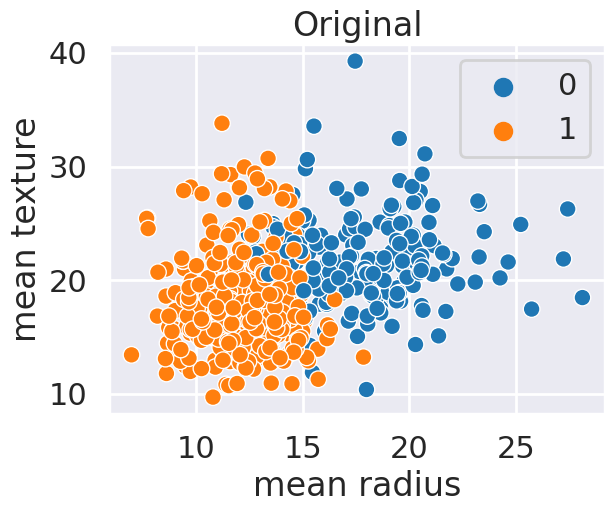

ENN: 类别为 0 的样本数: 212, 类别为 1 的样本数: 278


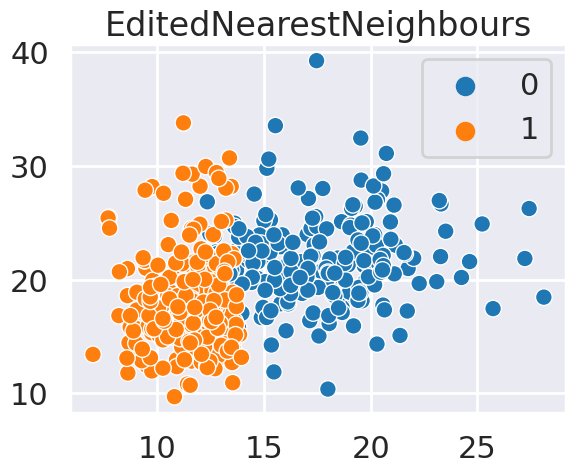

/home/zhouquan/anaconda3/envs/DLstudy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zhouquan/anaconda3/envs/DLstudy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

ENN-IHT: 类别为 0 的样本数: 212, 类别为 1 的样本数: 212


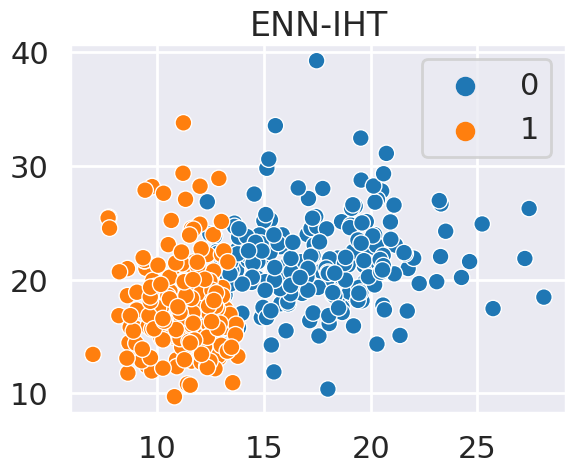

In [38]:
from collections import Counter
from sklearn.datasets import make_classification, load_breast_cancer, load_wine
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import EditedNearestNeighbours, InstanceHardnessThreshold
import matplotlib.pyplot as plt
from numpy import where
import seaborn as sns

data = load_breast_cancer()

X = data.data
y = data.target

print(f"类别为 0 的样本数: {X[y == 0].shape[0]}, 类别为 1 的样本数: {X[y == 1].shape[0]}")

sns.set_style("darkgrid")
sns.scatterplot(data=data, x=X[:, 0], y=X[:, 1], hue=y)
plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")
plt.title("Original")
plt.show()

#Edited Nearest Neighbor
sampler = EditedNearestNeighbours(n_neighbors=5)

X1, y1 = sampler.fit_resample(X, y)

while True:
    a, b = X1[y1 == 0].shape[0], X1[y1 == 1].shape[0]
    X1, y1 = sampler.fit_resample(X1, y1)
    if a == X1[y1 == 0].shape[0] and b == X1[y1 == 1].shape[0]:
        break
print(
    f"ENN: 类别为 0 的样本数: {X1[y1 == 0].shape[0]}, 类别为 1 的样本数: {X1[y1 == 1].shape[0]}"
)

sns.scatterplot(data=data, x=X1[:, 0], y=X1[:, 1], hue=y1)
plt.title("EditedNearestNeighbours")
plt.show()

iht = InstanceHardnessThreshold(estimator=LogisticRegression(), cv=10, random_state=42)
X_res, y_res = iht.fit_resample(X1, y1)
print(
    f"ENN-IHT: 类别为 0 的样本数: {X_res[y_res == 0].shape[0]}, 类别为 1 的样本数: {X_res[y_res == 1].shape[0]}"
)

sns.scatterplot(data=data, x=X_res[:, 0], y=X_res[:, 1], hue=y_res)
plt.title("ENN-IHT")
plt.show()

TypeError: All intermediate steps of the chain should be estimators that implement fit and transform or fit_resample (but not both) or be a string 'passthrough' '[EditedNearestNeighbours(), InstanceHardnessThreshold(cv=10, estimator=LogisticRegression(),
                          random_state=42)]' (type <class 'list'>) doesn't)

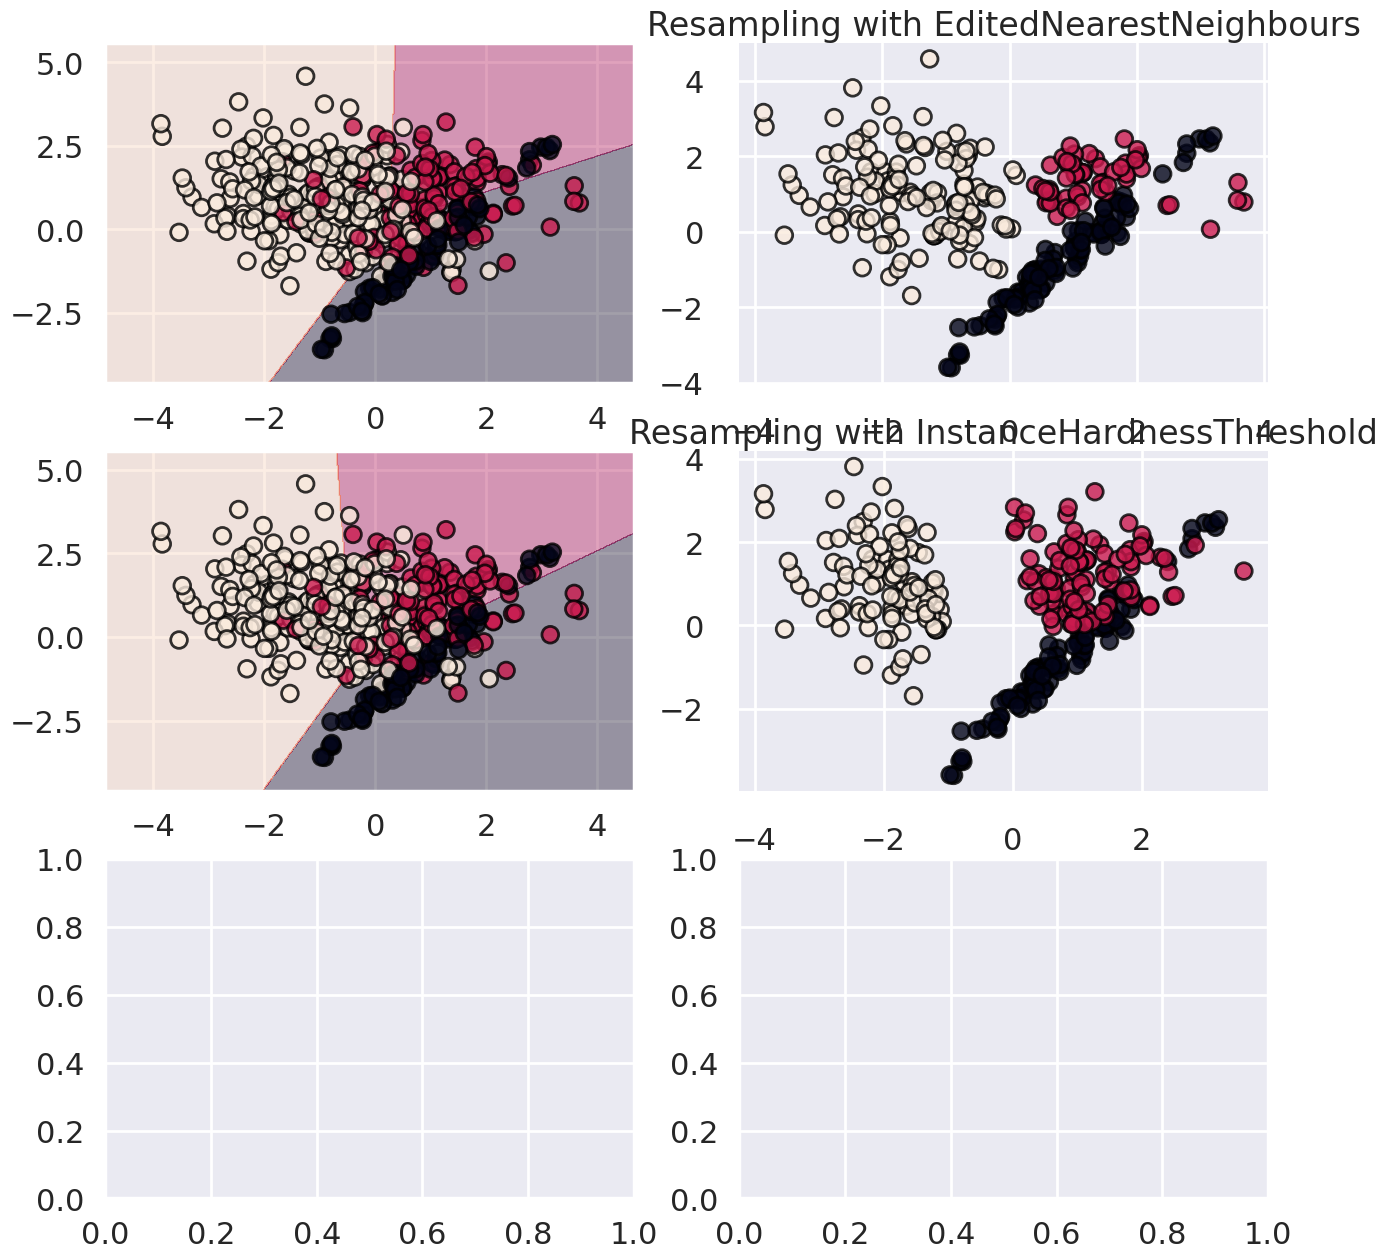

In [39]:
import seaborn as sns
sns.set_context("poster")

from sklearn.datasets import make_classification
def create_dataset(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )
    
def plot_resampling(X, y, sampler, ax, title=None):
    if isinstance(sampler, list):
        X_res = X
        y_res = y
        for _ in range(len(sampler)):
            X_res, y_res = sampler.fit_resample(X_res, y_res)
    else:
        X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

import numpy as np
from imblearn.pipeline import make_pipeline

def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()



from imblearn.under_sampling import (
    AllKNN,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
)

X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)

samplers = [
    EditedNearestNeighbours(),
    # RepeatedEditedNearestNeighbours(),
    InstanceHardnessThreshold(estimator=LogisticRegression(), cv=10, random_state=42),
    [EditedNearestNeighbours(), InstanceHardnessThreshold(estimator=LogisticRegression(), cv=10, random_state=42)]
    # AllKNN(allow_minority=True),
]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0]
    )
    plot_resampling(
        X, y, sampler, ax[1]
    )

fig.tight_layout()

In [8]:
assert all([True, True, True])